In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from io import StringIO
%matplotlib inline

In [80]:
data=StringIO("""
Index,0.5,1.5,4.0,8.0,11.0
95,0,0,0,0,4
85,0,0,1,0,1
75,0,0,0,0,2
65,0,0,0,0,1
55,0,0,0,3,3
45,0,0,1,2,2
35,0,1,2,7,3
25,0,4,16,5,0
15,12,4,2,1,0
10,2,2,1,3,1
0,0,2,3,1,1
""")
data = pd.read_csv(data, sep=",", index_col=0)

In [100]:
data

,0.5,1.5,4.0,8.0,11.0
Index,,,,,
95,0,0,0,0,4
85,0,0,1,0,1
75,0,0,0,0,2
65,0,0,0,0,1
55,0,0,0,3,3
45,0,0,1,2,2
35,0,1,2,7,3
25,0,4,16,5,0
15,12,4,2,1,0


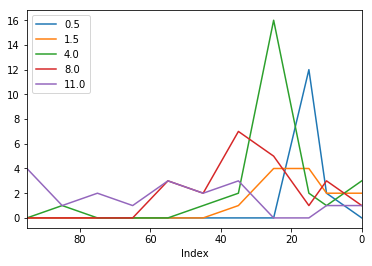

In [103]:
data.plot()